In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data_path = '../data/'

In [3]:
with open(data_path + 'data_with_current.pkl','rb') as f:
    data = pickle.load(f)

In [4]:
data[0].keys()

dict_keys(['V_nom', 'I_nom', 'V_det', 'I_det', 'V_pu', 'I_pu', 'sinal_notch', 'sinal_notch_current', 'sinal_notch_final', 'sinal_notch_final_current', 'faultType', 'V_index', 'I_index'])

In [5]:
data[0]['I_det']

array([[ 397.11194049,  193.19418671, -590.3061272 ],
       [ 385.89594452,  207.11264676, -593.00859128],
       [ 374.44695786,  220.9076014 , -595.35455926],
       ...,
       [-484.43080099, 1199.25285288, -267.78349173],
       [-470.06246524, 1094.22171417, -177.35976182],
       [-453.66101153,  966.63357504,  -66.65132459]])

In [6]:
data[0]['I_det'].shape

(384, 3)

In [5]:
np.random.normal()

1.6254069617965468

In [14]:
from noise import decompress_pickle

INPUT_DATA_PATH = '../input-data/'

In [15]:
data = decompress_pickle(INPUT_DATA_PATH + 'noise_data')

In [16]:
data[0].keys()

dict_keys(['v_noise', 'i_noise', 'fault_type', 'fault_type_one_hot', 'distance', 'angle', 'resistance'])

In [24]:
import matplotlib.pyplot as plt

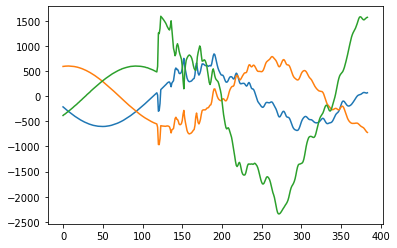

In [25]:
plt.plot(data[0]['i_noise'][0,:])
plt.plot(data[0]['i_noise'][1,:])
plt.plot(data[0]['i_noise'][2,:])

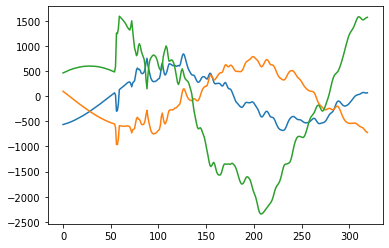

In [26]:
plt.plot(data[0]['i_noise'][0,64:])
plt.plot(data[0]['i_noise'][1,64:])
plt.plot(data[0]['i_noise'][2,64:])

In [27]:
data[0]['i_noise'][0,64:].shape

(320,)

In [28]:
def drange(start, stop, step):
    while start < stop:
        yield start
        start *= step

In [57]:
fault_dict = {'fault_type': data[0]['fault_type'], 'fault_type_one_hot': data[0]['fault_type_one_hot'],
              'distance': data[0]['distance'], 'angle': data[0]['angle'], 'resistance': data[0]['resistance'],
              'v_noise': data[0]['v_noise'], 'i_noise': data[0]['i_noise']}
data_list = []
for n in drange(1, 33, 2):
    size = int((data[0]['i_noise'][0,64:].shape[0] - 64) / n + 64)
    i_signalA = data[0]['i_noise'][0,64:][:size]
    i_signalB = data[0]['i_noise'][1,64:][:size]
    i_signalC = data[0]['i_noise'][2,64:][:size]
    i_signalZ = data[0]['i_noise'][3,64:][:size]
    i_signal = np.vstack([i_signalA, i_signalB, i_signalC, i_signalZ])

    v_signalA = data[0]['v_noise'][0,64:][:size]
    v_signalB = data[0]['v_noise'][1,64:][:size]
    v_signalC = data[0]['v_noise'][2,64:][:size]
    v_signalZ = data[0]['v_noise'][3,64:][:size]
    v_signal = np.vstack([v_signalA, v_signalB, v_signalC, v_signalZ])
    fault_dict.update({f'i_cycle_{n}': i_signal, f'v_cycle_{n}': v_signal})

data_list.append(fault_dict)

In [59]:
data_list[0].keys()

dict_keys(['fault_type', 'fault_type_one_hot', 'distance', 'angle', 'resistance', 'v_noise', 'i_noise', 'i_cycle_1', 'v_cycle_1', 'i_cycle_2', 'v_cycle_2', 'i_cycle_4', 'v_cycle_4', 'i_cycle_8', 'v_cycle_8', 'i_cycle_16', 'v_cycle_16', 'i_cycle_32', 'v_cycle_32'])

In [ ]:
final_samples = []
keys = ['I_pu', 'I_30db', 'I_40db', 'I_50db', 'I_60db', 'I_70db', 'I_80db', 'I_90db', 'I_100db']
for data in final_data:
    append_dict = {}
    for n in drange(1, 33, 2):
        data_dict = {}
        for key in keys: 
            size = int((data[key][64:,:].shape[0] - 64) / n + 64)
            signal = data[key][64:, :]
            signal_z = signal.sum(axis=1).reshape(-1,1)
            final = np.concatenate((signal, signal_z), axis=1)
            data_dict[key] = final[:size, :]
        append_dict.update({'fault_type': data['fault_type'][0], 'cycle_' + str(n): data_dict})
    final_samples.append(append_dict)

In [52]:
for n in drange(1, 33, 2):
    size = int((data[0]['v_noise'][0,64:].shape[0] - 64) / n + 64)
    signalA = data[0]['v_noise'][0,64:][:size]
    signalB = data[0]['v_noise'][1,64:][:size]
    signalC = data[0]['v_noise'][2,64:][:size]
    signalZ = data[0]['v_noise'][3,64:][:size]
    v_signal = np.vstack([signalA, signalB, signalC, signalZ])
    print(v_signal.shape)

(4, 320)
(4, 192)
(4, 128)
(4, 96)
(4, 80)
(4, 72)


In [15]:
size = int((data[key][64:,:].shape[0] - 64) / n + 64)
signal = data[key][64:, :]
signal_z = signal.sum(axis=1).reshape(-1,1)
final = np.concatenate((signal, signal_z), axis=1)
data_dict[key] = final[:size, :]
append_dict.update({'fault_type': data['fault_type'][0], 'cycle_' + str(n): data_dict})

320

In [1]:
from noise import decompress_pickle
import matplotlib.pyplot as plt
INPUT_DATA_PATH = '../input-data/'

In [2]:
data = decompress_pickle(INPUT_DATA_PATH + 'cycle_data')

In [3]:
len(data)

940

In [4]:
data[0].keys()

dict_keys(['fault_type', 'fault_type_one_hot', 'distance', 'angle', 'resistance', 'v_noise', 'i_noise', 'i_cycle_1', 'v_cycle_1', 'i_cycle_2', 'v_cycle_2', 'i_cycle_4', 'v_cycle_4', 'i_cycle_8', 'v_cycle_8', 'i_cycle_16', 'v_cycle_16', 'i_cycle_32', 'v_cycle_32'])

In [5]:
print(data[0]['i_cycle_2'][192:384].shape)

(192,)


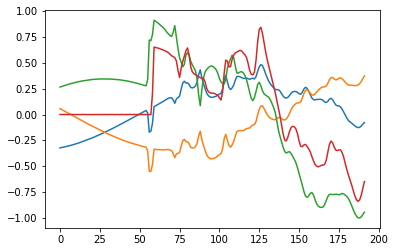

In [6]:
plt.plot(data[0]['i_cycle_2'][:192])
plt.plot(data[0]['i_cycle_2'][192:384])
plt.plot(data[0]['i_cycle_2'][384:576])
plt.plot(data[0]['i_cycle_2'][576:768])

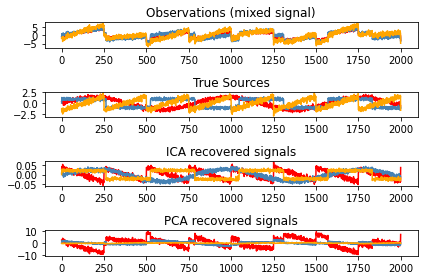

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()


In [8]:
X.shape

(2000, 3)

In [9]:
S.shape

(2000, 3)

In [10]:
data[0]['i_cycle_2'].shape

(768,)

In [12]:
new = data[0]['i_cycle_2'].reshape((192,4))

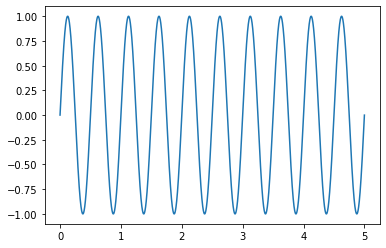

In [3]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [4]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

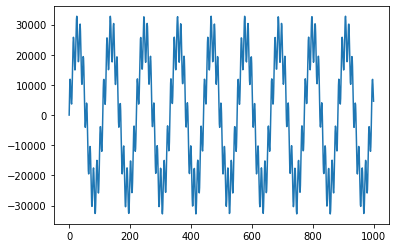

In [5]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

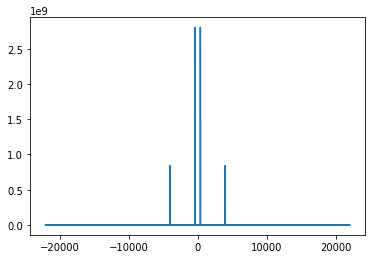

In [6]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()


In [10]:
normalized_tone.shape

(220500,)

In [11]:
y.shape

(220500,)

In [12]:
N

220500

In [8]:
SAMPLE_RATE

44100

In [13]:
15360 / 60

256.0

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
SAMPLE_SIGNAL = '/home/gabriel/Documentos/projects/mestrado/fault-classification/data/detected_signals/detected_sim_Chesf_500_Classifier_LOC3_AB_20_0_1.0000.mat'
mat = sio.loadmat(SAMPLE_SIGNAL)

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'V_nom', 'I_nom', 'V_index', 'I_index', 'V_det', 'I_det', 'faultType', 'fs'])

In [4]:
mat['I_nom'][:,2].shape

(5632,)

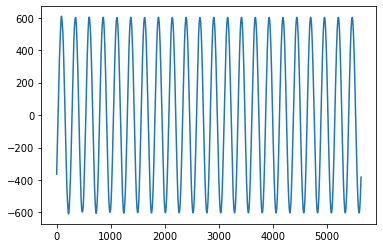

In [7]:
plt.plot(mat['I_nom'][:,2])
plt.show()

In [8]:
import plotly.graph_objects as go
import numpy as np
from scipy.fft import fft, fftfreq

yf = fft(mat['I_nom'][:,2])
xf = fftfreq(mat['I_nom'][:,2].shape[0], 1 / 15360)

fig = go.Figure(data=go.Scatter(x=np.abs(xf), y=np.abs(yf)))
fig.show()


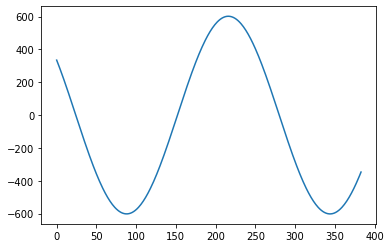

In [9]:
plt.plot(mat['I_det'][:,2])
plt.show()

In [10]:
data = mat['I_det'][:,2]

In [11]:
data.shape

(384,)

In [12]:
yf = fft(data)
xf = fftfreq(data.shape[0], 1 / 15360)

fig = go.Figure(data=go.Scatter(x=np.abs(xf), y=np.abs(yf)))
fig.show()

In [13]:
512 - 384

128

In [14]:
new_data = np.concatenate((data, np.zeros(128)))

In [15]:
yf = fft(new_data)
xf = fftfreq(new_data.shape[0], 1 / 15360)

fig = go.Figure(data=go.Scatter(x=np.abs(xf), y=np.abs(yf)))
fig.show()